# Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [6]:
df.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [7]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
neg_quantity_df=df[df['Quantity']<0]
neg_quantity_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
indices = df.loc[df['Quantity']<0].index.tolist()
#indices

In [10]:
df =df.drop(indices)
###get rid of the rows with a negative quantity


In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
df.reset_index(inplace=True)

In [13]:
df.drop(['index','StockCode','Description'], axis =1,inplace =True)
df.head(3)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


# feature engineering

In [14]:
df['total_cost']= df['Quantity'] * df['UnitPrice']
df.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
df1=df.copy()

In [16]:
df1.drop(['InvoiceNo','InvoiceDate','Country'],axis=1,inplace=True)
df1.head()

,Quantity,UnitPrice,CustomerID,total_cost
0,6,2.55,17850.0,15.30
1,6,3.39,17850.0,20.34
2,8,2.75,17850.0,22.00
3,6,3.39,17850.0,20.34
4,6,3.39,17850.0,20.34


In [17]:
df2=df1.groupby('CustomerID').agg({'Quantity':['sum'],'total_cost':['sum'],'UnitPrice':['mean']})
df2.head()

,Quantity,total_cost,UnitPrice
,sum,sum,mean
CustomerID,,,
12346.0,74215,77183.60,1.040000
12347.0,2458,4310.00,2.644011
12348.0,2341,1797.24,5.764839
12349.0,631,1757.55,8.289041
12350.0,197,334.40,3.841176


In [18]:
df2=df2.reset_index()
df2.head(2)

,CustomerID,Quantity,total_cost,UnitPrice
,,sum,sum,mean
0,12346.0,74215,77183.6,1.040000
1,12347.0,2458,4310.0,2.644011


In [19]:
frequency_df=df.groupby('CustomerID')[['InvoiceNo']].count()

In [20]:
freq=frequency_df['InvoiceNo'].to_list()

In [21]:
df2['frequency']=freq

In [22]:
df2

,CustomerID,Quantity,total_cost,UnitPrice,frequency
,,sum,sum,mean,
0,12346.0,74215,77183.60,1.040000,1
1,12347.0,2458,4310.00,2.644011,182
2,12348.0,2341,1797.24,5.764839,31
3,12349.0,631,1757.55,8.289041,73
4,12350.0,197,334.40,3.841176,17
...,...,...,...,...,...
4334,18280.0,45,180.60,4.765000,10
4335,18281.0,54,80.82,5.622857,7
4336,18282.0,103,178.05,5.199167,12


In [23]:
print('Start date: {}'.format(df.InvoiceDate.min()))
print('End date: {}'.format(df.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [24]:
day="2012-01-01"
day=pd.to_datetime(day)

In [25]:
recency=df.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})
recencey_list=recency['InvoiceDate'].tolist()

In [26]:
df2['recency']=recencey_list

In [27]:
df2

,CustomerID,Quantity,total_cost,UnitPrice,frequency,recency
,,sum,sum,mean,,
0,12346.0,74215,77183.60,1.040000,1,347
1,12347.0,2458,4310.00,2.644011,182,24
2,12348.0,2341,1797.24,5.764839,31,97
3,12349.0,631,1757.55,8.289041,73,40
4,12350.0,197,334.40,3.841176,17,332
...,...,...,...,...,...,...
4334,18280.0,45,180.60,4.765000,10,299
4335,18281.0,54,80.82,5.622857,7,202
4336,18282.0,103,178.05,5.199167,12,29


In [28]:
df2.columns=['CustomerID','Total quantity','total spending','average unit price','frequency','recency']

In [29]:
df2.drop(['CustomerID'],axis=1,inplace=True)

In [30]:
df2.head(2)

,Total quantity,total spending,average unit price,frequency,recency
0,74215,77183.6,1.040000,1,347
1,2458,4310.0,2.644011,182,24


##pca

In [31]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [32]:
filtered_df = df2[df2['average unit price']>1500]
filtered_df1 = df2[df2['Total quantity']>150000]
##these two rows has strange values that will ruin clustering
filtered_df

,Total quantity,total spending,average unit price,frequency,recency
4014,1,2033.1,2033.1,1,107


In [33]:
filtered_df1

,Total quantity,total spending,average unit price,frequency,recency
1690,197491,280206.02,2.488505,2080,23


In [34]:
df2=df2.drop(index=[1690])

In [35]:
df2=df2.drop(index=[4014])

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

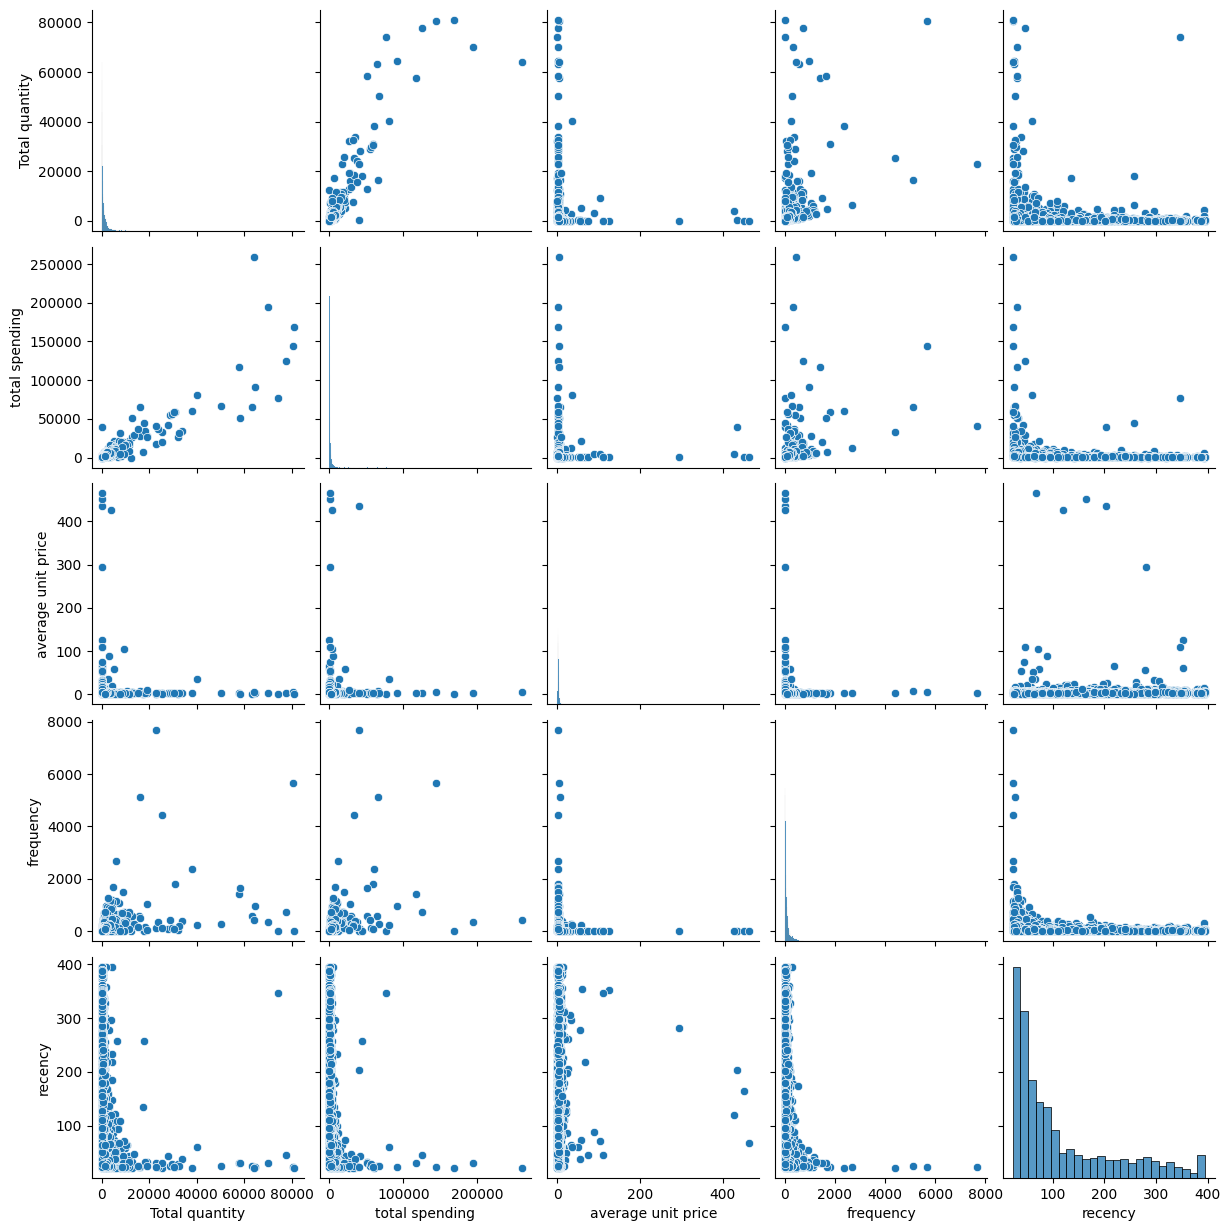

In [36]:
sns.pairplot(df2)

In [37]:
df3=df2.drop('average unit price',axis =1)
df3.head(2)

,Total quantity,total spending,frequency,recency
0,74215,77183.6,1,347
1,2458,4310.0,182,24


# PCA

In [38]:
x_scl = StandardScaler().fit_transform(df2)

In [39]:
dim_red = PCA()

In [40]:
x_pca = dim_red.fit_transform(x_scl)

In [41]:
dim_red.components_

array([[ 6.17811809e-01,  6.10875793e-01, -1.66246936e-04,
         4.49940187e-01, -2.06623171e-01],
       [ 1.27857714e-01,  1.72913597e-01,  7.84274869e-01,
        -1.52073684e-01,  5.61729310e-01],
       [-1.77052906e-01, -1.62644678e-01,  6.17725644e-01,
         1.25156785e-01, -7.38207143e-01],
       [-2.50512014e-01, -2.82703751e-01,  4.91598136e-02,
         8.70693372e-01,  3.11124870e-01],
       [-7.12640844e-01,  7.00397710e-01, -3.01868211e-02,
         2.56174541e-02, -4.31017587e-03]])

In [42]:
dim_red.explained_variance_ratio_

array([0.45291139, 0.20842236, 0.18728328, 0.13262483, 0.01875814])

In [43]:
dim_red.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4'], dtype=object)

In [44]:
df_pca = pd.DataFrame(x_pca,columns=['pca0', 'pca1', 'pca2', 'pca3','pca4'])

In [45]:
df_pca = df_pca.drop(columns=[df_pca.columns[-1]])


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

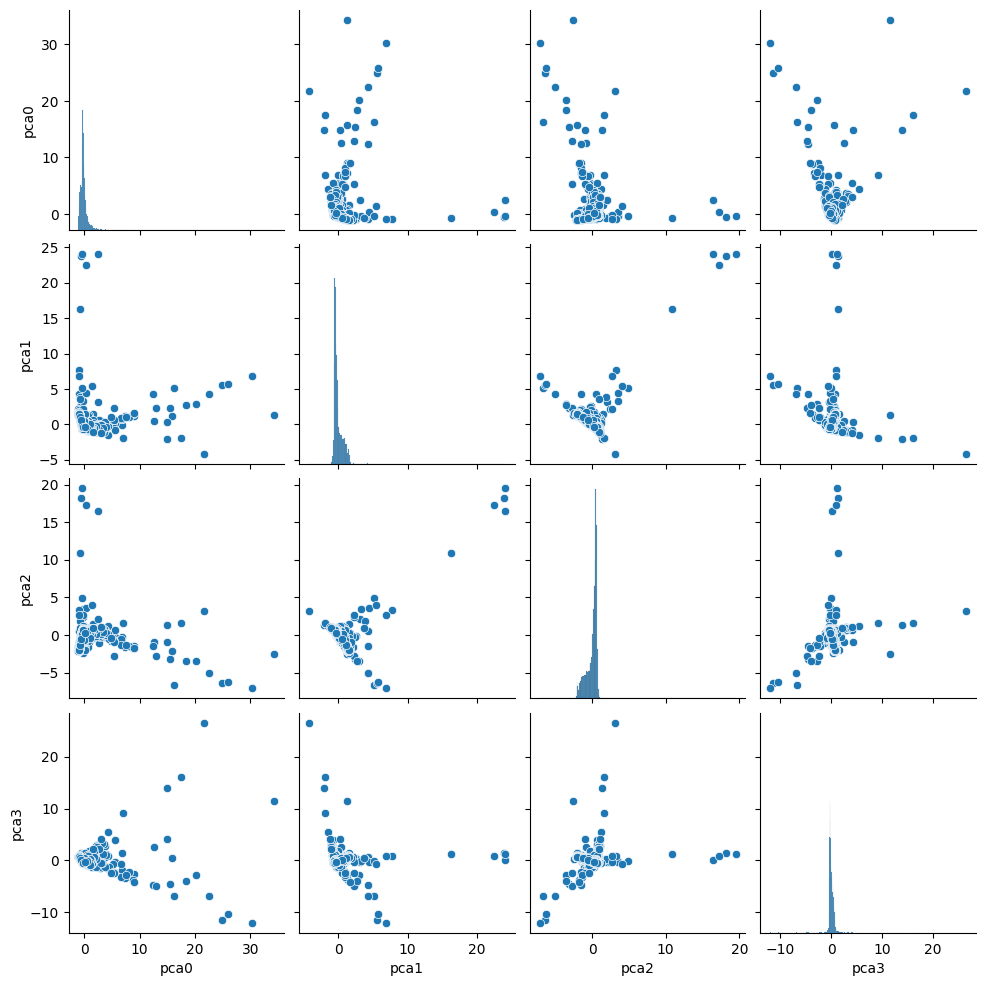

In [46]:
sns.pairplot(df_pca)


In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## elbow method

In [48]:
lo_inertias=[]

In [49]:
for n in range(1,15):
    km=KMeans(n_clusters=n).fit(df_pca)
    lo_inertias.append(km.inertia_)
    print(n,km.inertia_)

1 21278.229718217048
2 17594.63689043978
3 11004.516911943745
4 7210.623473384666
5 6090.93923910284
6 4668.68091427607
7 4235.730643532816
8 3205.5401093172118
9 2917.7952782533794
10 2425.8061406562683
11 2289.0858624247912
12 1990.443298166444
13 1750.2141778733073
14 1623.6868787639096


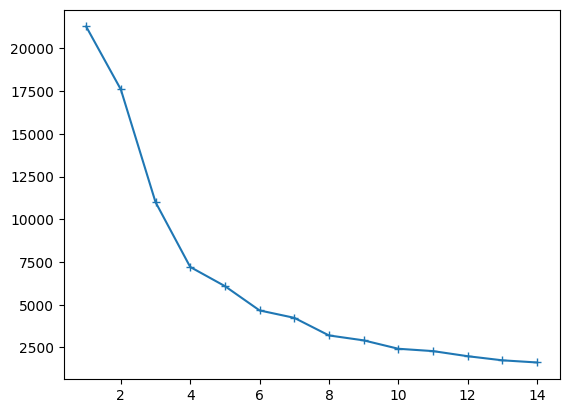

In [50]:
plt.plot(range(1,15),lo_inertias,marker= '+')

## k-means

In [90]:
km = KMeans(n_clusters = 5)

In [91]:
predictions = km.fit_predict(df_pca)

In [92]:
cluster_labels=km.labels_+1

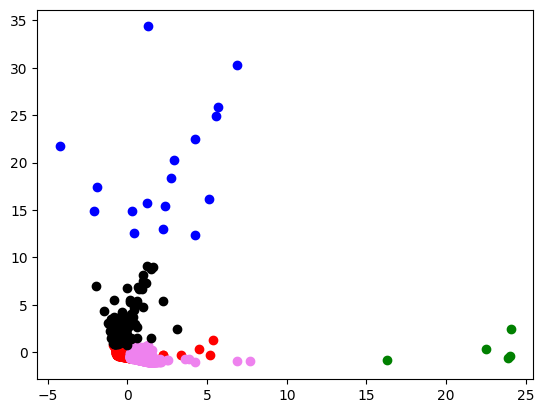

In [93]:
plt.scatter(df_pca.iloc[predictions==0 , 1],df_pca.iloc[predictions==0,0],color='red')
plt.scatter(df_pca.iloc[predictions==1 , 1],df_pca.iloc[predictions==1,0],color='blue')
plt.scatter(df_pca.iloc[predictions==2 , 1],df_pca.iloc[predictions==2,0],color='violet')
plt.scatter(df_pca.iloc[predictions==3 , 1],df_pca.iloc[predictions==3,0],color='green')
plt.scatter(df_pca.iloc[predictions==4 , 1],df_pca.iloc[predictions==4,0],color='black')


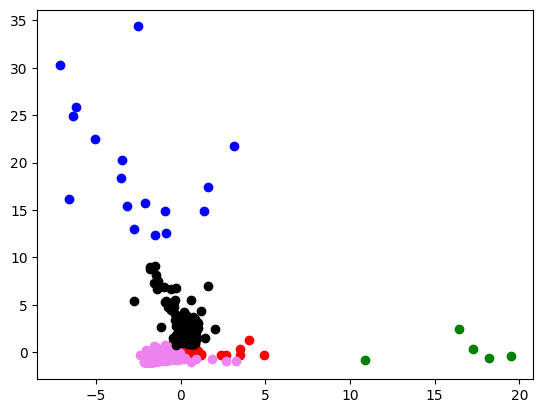

In [94]:
plt.scatter(df_pca.iloc[predictions==0 , 2],df_pca.iloc[predictions==0,0],color='red')
plt.scatter(df_pca.iloc[predictions==1 , 2],df_pca.iloc[predictions==1,0],color='blue')
plt.scatter(df_pca.iloc[predictions==2 , 2],df_pca.iloc[predictions==2,0],color='violet')
plt.scatter(df_pca.iloc[predictions==3 , 2],df_pca.iloc[predictions==3,0],color='green')
plt.scatter(df_pca.iloc[predictions==4 , 2],df_pca.iloc[predictions==4,0],color='black')


In [107]:
df2["Clusters"]=(km.labels_+1)

### silhouette_score

In [116]:
df3=df2.drop('Clusters',axis=1).astype(int)
silhouette_score = silhouette_score(df3,df2["Clusters"] )

In [117]:
silhouette_score

-0.036519690764438235

In [100]:
df2.head(2)

,Total quantity,total spending,average unit price,frequency,recency,Clusters
0,74215,77183.6,1.040000,1,347,2
1,2458,4310.0,2.644011,182,24,1


(array([3008.,    0.,   17.,    0.,    0., 1055.,    0.,    5.,    0.,
         252.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

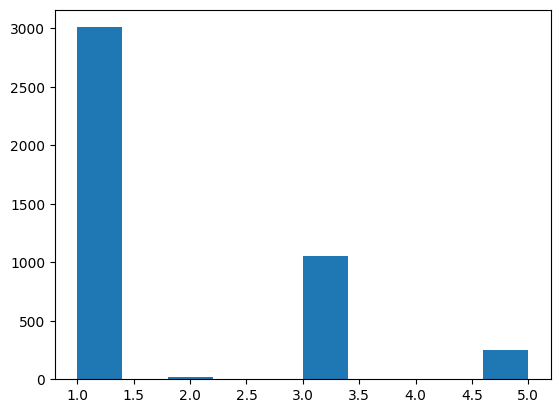

In [101]:
plt.hist(df2['Clusters'])

In [102]:
df2['Clusters'].value_counts()

Clusters
1    3008
3    1055
5     252
2      17
4       5
Name: count, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

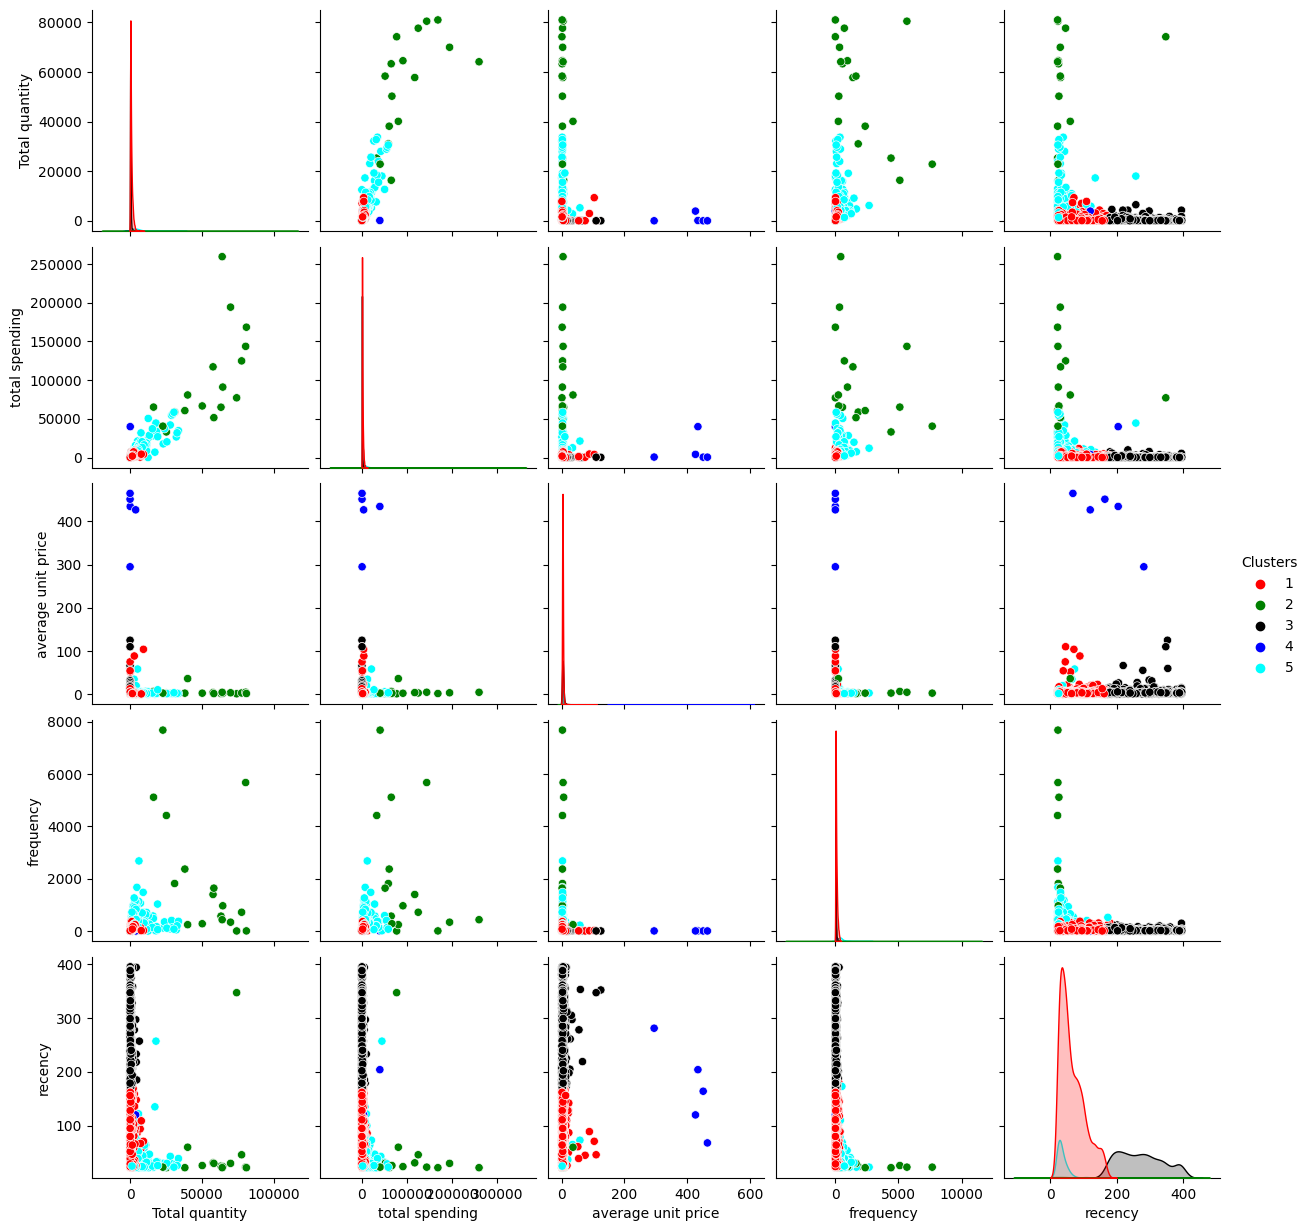

In [104]:
sns.pairplot(df2,hue='Clusters',palette=['red','green','black','blue','cyan'])


In [1]:
#1- the first cluster with the % red % color represent the majorety, and those are mostly the people who used the store once or few times,

#suggegions: show them a good service and send their frequent e-mails or messages with the current offers

In [2]:
#2-the second cluster with the % green % color are very few customers who has the highest spending and buy large qauntity

#suggegions:can offer them special offers for buying large quantities, specialy they dont frequently visit the store, so the offers may attract them

In [3]:
#3-the third cluster with the % blue % color has the least customers about only 5 customers, those who buy expensive units.

#suggegions: customer rarly buy expensive units, its better to be replaced by cheaper units with more variety to attract more customers, or these #expensive units will be better to be pre ordered by the customers, may be from the online website to save the cost of storage, or provide the least #amount of these pieces like two units of these expensive pieces

In [4]:
#4-the fourth cluster with % black % color are the customers that have visit the store from long time

#suggegions: it would be better to send them a small message with only the best offers that store offer just to attract them 

In [5]:
#5-the fifth cluster with % cyan % color are the frequent customers who buy few things 

#suggegions: those should have the best treatment by the workers, to make them feel like being in a home to make sure them become frequent customers.
#and it would be good if they got a good offer from time to time just to link them with the store